# Avazu - Click-Through Rate Prediction

Julia Kang - jkang613@gmail.com - AMLI 2019 - Mills College

In [4]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from math import sqrt #for RMSE


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Model: SGDClassifier Model

**Logistic vs SGDClassifier:** Logistic Regression by default uses Gradient Descent and as such it would be better to use SGD Classifier on larger data sets. One another reason you might want to use SGD Classifier is, logistic regression, in its vanilla sklearn form, won’t work if you can’t hold the dataset in RAM but SGD will still work.

For sufficiently large datasets, it is best to implement SGD Classifier instead of Logistic Classifier to produce similar results in much less time.

In [5]:
# raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = raw_df.drop('Unnamed: 0', axis = 1) 

raw_df.head()
# len(sub_df)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,time,device_type_a,device_type_b,device_type_c,device_type_d,device_type_e,device_conn_type_a,device_conn_type_b,device_conn_type_c,device_conn_type_d
0,0,1005,0,755,1712,3,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
1,1,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
2,0,1002,0,2052,1680,5,2129,65,0,30034,...,0,1,0,0,0,0,1,0,0,0
3,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
4,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0


In [8]:
FEATURES = []

for col in raw_df.columns:
    if np.issubdtype(raw_df[col].dtypes , np.number):
        FEATURES.append(col)

TARGET = 'click'

In [9]:
# split the data into test and train
train, test  = train_test_split(
  raw_df,                        # split our digits dataframe
  stratify=raw_df[TARGET],       # stratify by the 'click' column   
  test_size=0.2,                # 20% of the data should be held for testing
  random_state=42               # hard-coded random state for repeatability in the example
)

train.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,time,device_type_a,device_type_b,device_type_c,device_type_d,device_type_e,device_conn_type_a,device_conn_type_b,device_conn_type_c,device_conn_type_d
242327,0,1005,0,1145,1680,5,2294,75,3,43137,...,4,0,1,0,0,0,1,0,0,0
274613,1,1005,1,1854,1327,19,2129,65,0,43137,...,3,0,1,0,0,0,1,0,0,0
323457,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
275743,0,1005,1,837,180,19,2129,65,0,43137,...,4,0,1,0,0,0,1,0,0,0
394154,0,1005,1,284,1895,19,2129,65,0,43137,...,16,0,1,0,0,0,1,0,0,0


In [11]:
train_features = np.array(train[FEATURES])
train_labels = np.array(train[TARGET])
test_features = np.array(test[FEATURES])
test_labels = np.array(test[TARGET])

In [12]:
sgd_classifier = linear_model.SGDClassifier(
    loss='log',
    random_state=2, # Specifying random state allow us to get repeatable outcomes
    tol=1e-3, 
    max_iter=500
) 
 
sgd_classifier.fit(train_features, train_labels.ravel())

# sgd_classifier.partial_fit(train_features, train_labels.ravel(), classes = [0,1]) #partial_fit SUCKED

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=500, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=2, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

In [14]:
# get the predictions using our model
sgd_predictions = sgd_classifier.predict(test_features)

# we can use the scores to set thresholds on the predictions made
sgd_scores = sgd_classifier.decision_function(test_features)
RMSE = sqrt(metrics.mean_squared_error(test_labels, sgd_predictions))
print(("Model using SGDClassifier has an RMSE of {} ").format(RMSE))
# 0.4158645213482616 - base
# 0.41513549509867104 - loss = log

LL = sqrt(metrics.log_loss(test_labels, sgd_predictions))
print(("Model using SGDClassifier has an LL of {} ").format(LL))
# Model using SGDClassifier has an LL of 2.425344088859301 - Using Ryan's Data

Model using SGDClassifier has an RMSE of 0.4126861205314228 
Model using SGDClassifier has an LL of 2.425344088859301 


Model where alpha is 0.0001 is completed
Model where alpha is 0.001 is completed
Model where alpha is 0.01 is completed
Model where alpha is 0.1 is completed
Model where alpha is 1.0 is completed
Model where alpha is 10.0 is completed
[2.425344088859301, 2.424551616420353, 2.432991424623698, 2.4300935778016814, 2.4264003718442004, 2.4287753075789067]


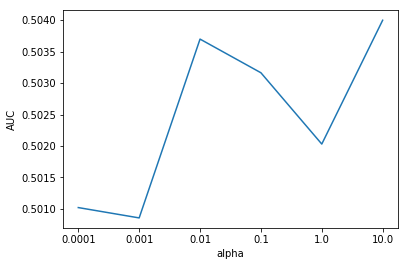

In [15]:
# loop through different C (alpha) values to see which gives us the largest AUC value
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]

LLS = []
AUCS = []

for a in alphas:
    sgd_classifier = linear_model.SGDClassifier(
        alpha = a,
        loss='log',
        random_state=2, # Specifying random state allow us to get repeatable outcomes
        tol=1e-3, 
        max_iter=500
    ) 

    sgd_classifier.fit(train_features, train_labels.ravel())
    sgd_predictions = sgd_classifier.predict(test_features)
    sgd_ll = sqrt(metrics.log_loss(test_labels, sgd_predictions))
    LLS.append(sgd_ll)
    sgd_fpr, sgd_tpr, sgd_thresholds = metrics.roc_curve(test_labels, sgd_predictions)
    sgd_roc_auc = metrics.auc(sgd_fpr, sgd_tpr)
    AUCS.append(sgd_roc_auc)
    
    print(("Model where alpha is {} is completed").format(a))

print(LLS)

# plot to visiual the different AUC in relation to alpha 
plt.plot(AUCS)
plt.xticks(range(len(alphas)), alphas)
plt.ylabel('AUC')
plt.xlabel('alpha')
plt.show()